In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:

MFN_data_North_America = pd.read_csv('/content/Msc_data_North_America.csv')

In [ ]:
MFN_data_North_America.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53992 entries, 0 to 53991
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   commodity__code                          53992 non-null  int64 
 1   measure__sid                             53992 non-null  int64 
 2   measure__type__description               53992 non-null  object
 3   commodity__indent                        53992 non-null  int64 
 4   commodity__suffix                        53992 non-null  int64 
 5   commodity__validity_start                53992 non-null  object
 6   commodity__sid                           53992 non-null  int64 
 7   commodity__description                   53992 non-null  object
 8   measure__geographical_area__sid          53992 non-null  int64 
 9   measure__geographical_area__description  53992 non-null  object
 10  measure__duty_expression                 53992 non-null  o

In [ ]:
MFN_data_North_America.head()

,commodity__code,measure__sid,measure__type__description,commodity__indent,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description,measure__geographical_area__sid,measure__geographical_area__description,measure__duty_expression
0,101210000,20000000,Third country duty,2,10,2012-01-01,93797,Horses,146,Canada,0%
1,101210000,20000000,Third country duty,2,10,2012-01-01,93797,Horses,59,Mexico,0%
2,101210000,20000000,Third country duty,2,80,2012-01-01,93796,Pure-bred breeding animals,146,Canada,0%
3,101210000,20000000,Third country duty,2,80,2012-01-01,93796,Pure-bred breeding animals,59,Mexico,0%
4,101210000,20178131,Tariff preference,2,10,2012-01-01,93797,Horses,146,Canada,0%


In [ ]:
MFN_data_North_America['commodity__code'] = MFN_data_North_America['commodity__code'].astype('int32')
MFN_data_North_America['measure__sid'] = MFN_data_North_America['measure__sid'].astype('int32')
MFN_data_North_America['commodity__indent'] = MFN_data_North_America['commodity__indent'].astype('int32')
MFN_data_North_America['commodity__suffix'] = MFN_data_North_America['commodity__suffix'].astype('int32')
MFN_data_North_America['commodity__sid'] = MFN_data_North_America['commodity__sid'].astype('int32')
MFN_data_North_America['measure__geographical_area__sid'] = MFN_data_North_America['measure__geographical_area__sid'].astype('int32')
MFN_data_North_America['measure__duty_expression'] = MFN_data_North_America['measure__duty_expression'].astype('str')

In [ ]:
MFN_data_North_America['measure__geographical_area__description'].unique()

array(['Canada', 'Mexico', 'United States', 'Nicaragua', 'Panama'],
      dtype=object)

In [ ]:
# Extract and convert percentages, ignoring non-percentage components
MFN_data_North_America['measure__duty_expression'] = (
    MFN_data_North_America['measure__duty_expression']
    .str.extract(r'(\d+)%')  # Extract the number before '%'
    .astype(float) / 100  # Convert to float, handle non-numeric with 'ignore'
).fillna(0)

In [ ]:
MFN_data_North_America['measure__type__description'].unique()

array(['Third country duty', 'Tariff preference', 'Veterinary control',
       'Restriction on export', 'Import control - CITES',
       'Export control - CITES', 'Import control on luxury goods',
       'Non preferential duty under authorised use',
       'Preferential tariff quota', 'Import control - IAS',
       'Animal Health Certificate', 'Non preferential tariff quota',
       'Non preferential tariff quota under authorised use',
       'Import control on seal products',
       'Definitive countervailing duty', 'Import prohibition',
       'Restriction on entry into free circulation',
       'Control on illegal, unreported and unregulated fishing',
       'Autonomous suspension under authorised use',
       'Preference under authorised use', 'Supplementary unit import',
       'Additional duties', 'Export control - Waste',
       'Import control - waste', 'Export control on cat and dog fur',
       'Import control on cat and dog fur', 'Import control',
       'Export control', 'I

In [ ]:
MFN_data_North_America['measure__duty_expression'].unique()

array([0.  , 0.2 , 0.08, 0.02, 0.07, 0.04, 0.06, 0.01])

In [ ]:
MFN_data_North_America['commodity__validity_start'] = pd.to_datetime(MFN_data_North_America['commodity__validity_start'])

In [ ]:

MFN_data_North_America['commodity__validity_year'] = pd.to_datetime(MFN_data_North_America['commodity__validity_start']).dt.year



In [ ]:
MFN_data_North_America.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53992 entries, 0 to 53991
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   commodity__code                          53992 non-null  int32         
 1   measure__sid                             53992 non-null  int32         
 2   measure__type__description               53992 non-null  object        
 3   commodity__indent                        53992 non-null  int32         
 4   commodity__suffix                        53992 non-null  int32         
 5   commodity__validity_start                53992 non-null  datetime64[ns]
 6   commodity__sid                           53992 non-null  int32         
 7   commodity__description                   53992 non-null  object        
 8   measure__geographical_area__sid          53992 non-null  int32         
 9   measure__geographical_area__description

In [ ]:
MFN_data_North_America['measure__geographical_area__description'].unique()

array(['Canada', 'Mexico', 'United States', 'Nicaragua', 'Panama'],
      dtype=object)

In [ ]:

MFN_data_North_America_United_States = MFN_data_North_America[MFN_data_North_America['measure__geographical_area__description'].isin(['Canada', 'Mexico', 'United States', 'Panama', 'Nicaragua'])]


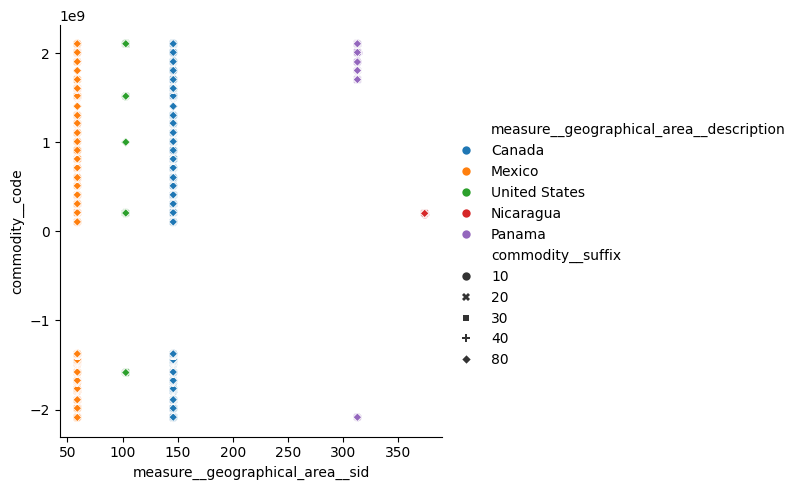

In [ ]:

sns.relplot(data = MFN_data_North_America_United_States, kind = 'scatter', x = 'measure__geographical_area__sid', y = 'commodity__code', hue = 'measure__geographical_area__description', style = 'commodity__suffix')

(array([13685.,     0.,     0.,   243.,  3180.,  2659.,  2433., 18903.,
         7996.,  4893.]),
 array([1972. , 1977.2, 1982.4, 1987.6, 1992.8, 1998. , 2003.2, 2008.4,
        2013.6, 2018.8, 2024. ]),
 <BarContainer object of 10 artists>)

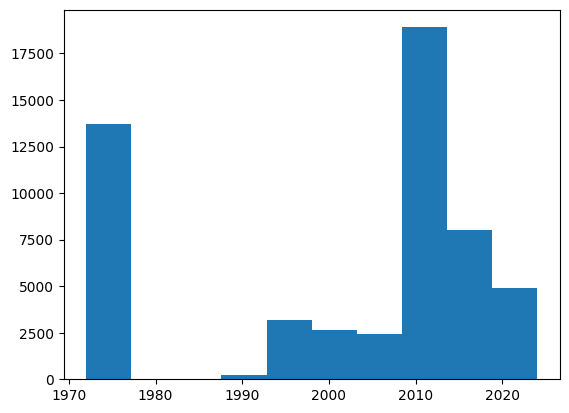

In [ ]:
plt.hist(MFN_data_North_America['commodity__validity_year'])

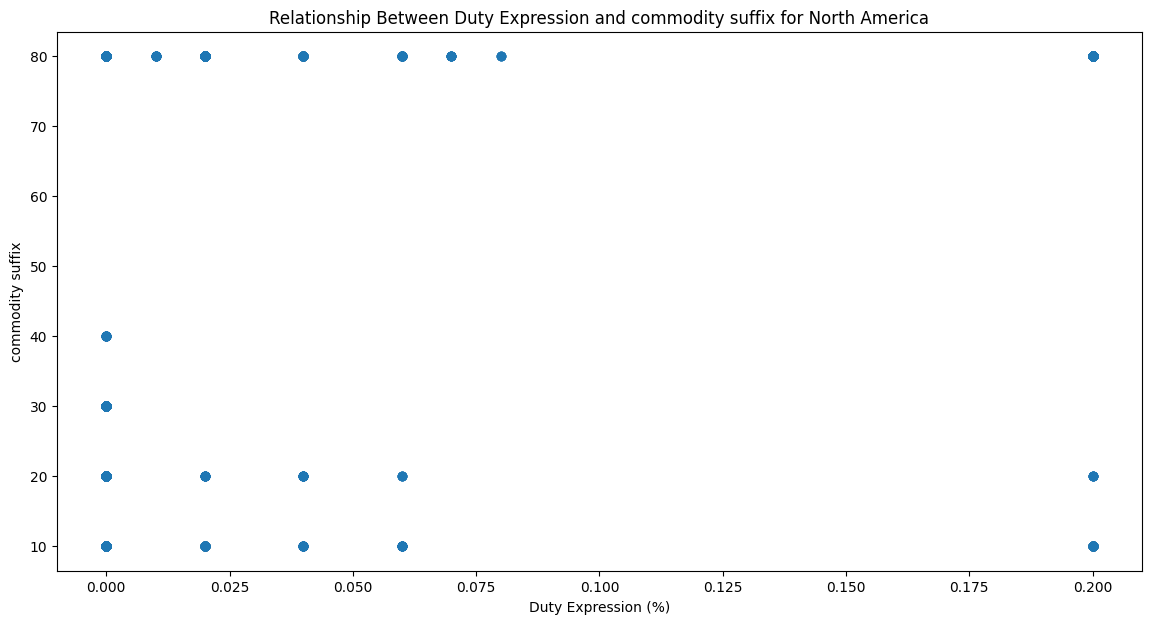

In [ ]:
# Scatter Plot - Relationship between trade value and another metric (e.g., duty expression)
plt.figure(figsize=(14, 7))
plt.scatter(MFN_data_North_America['measure__duty_expression'], MFN_data_North_America['commodity__suffix'])
plt.title('Relationship Between Duty Expression and commodity suffix for North America')
plt.xlabel('Duty Expression (%)')
plt.ylabel('commodity suffix')
plt.show()

<Axes: >

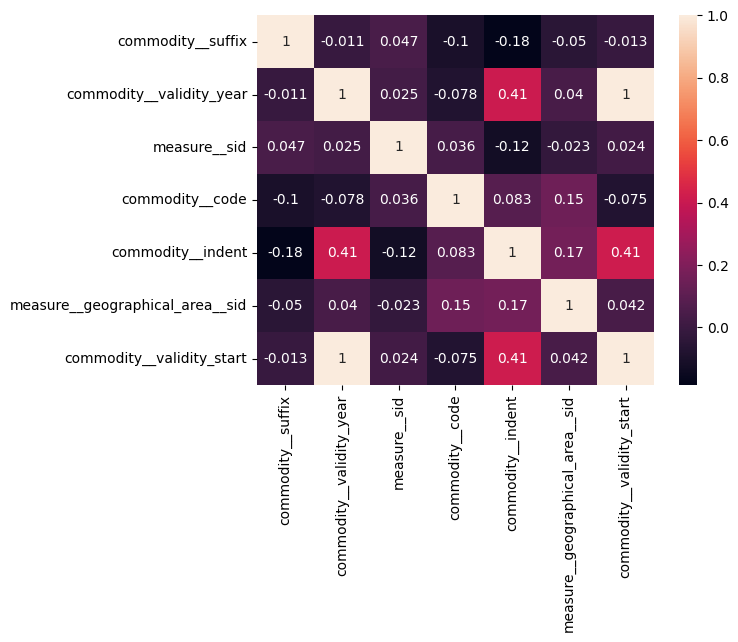

In [ ]:

sns.heatmap(MFN_data_North_America[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']].corr(),annot = True)

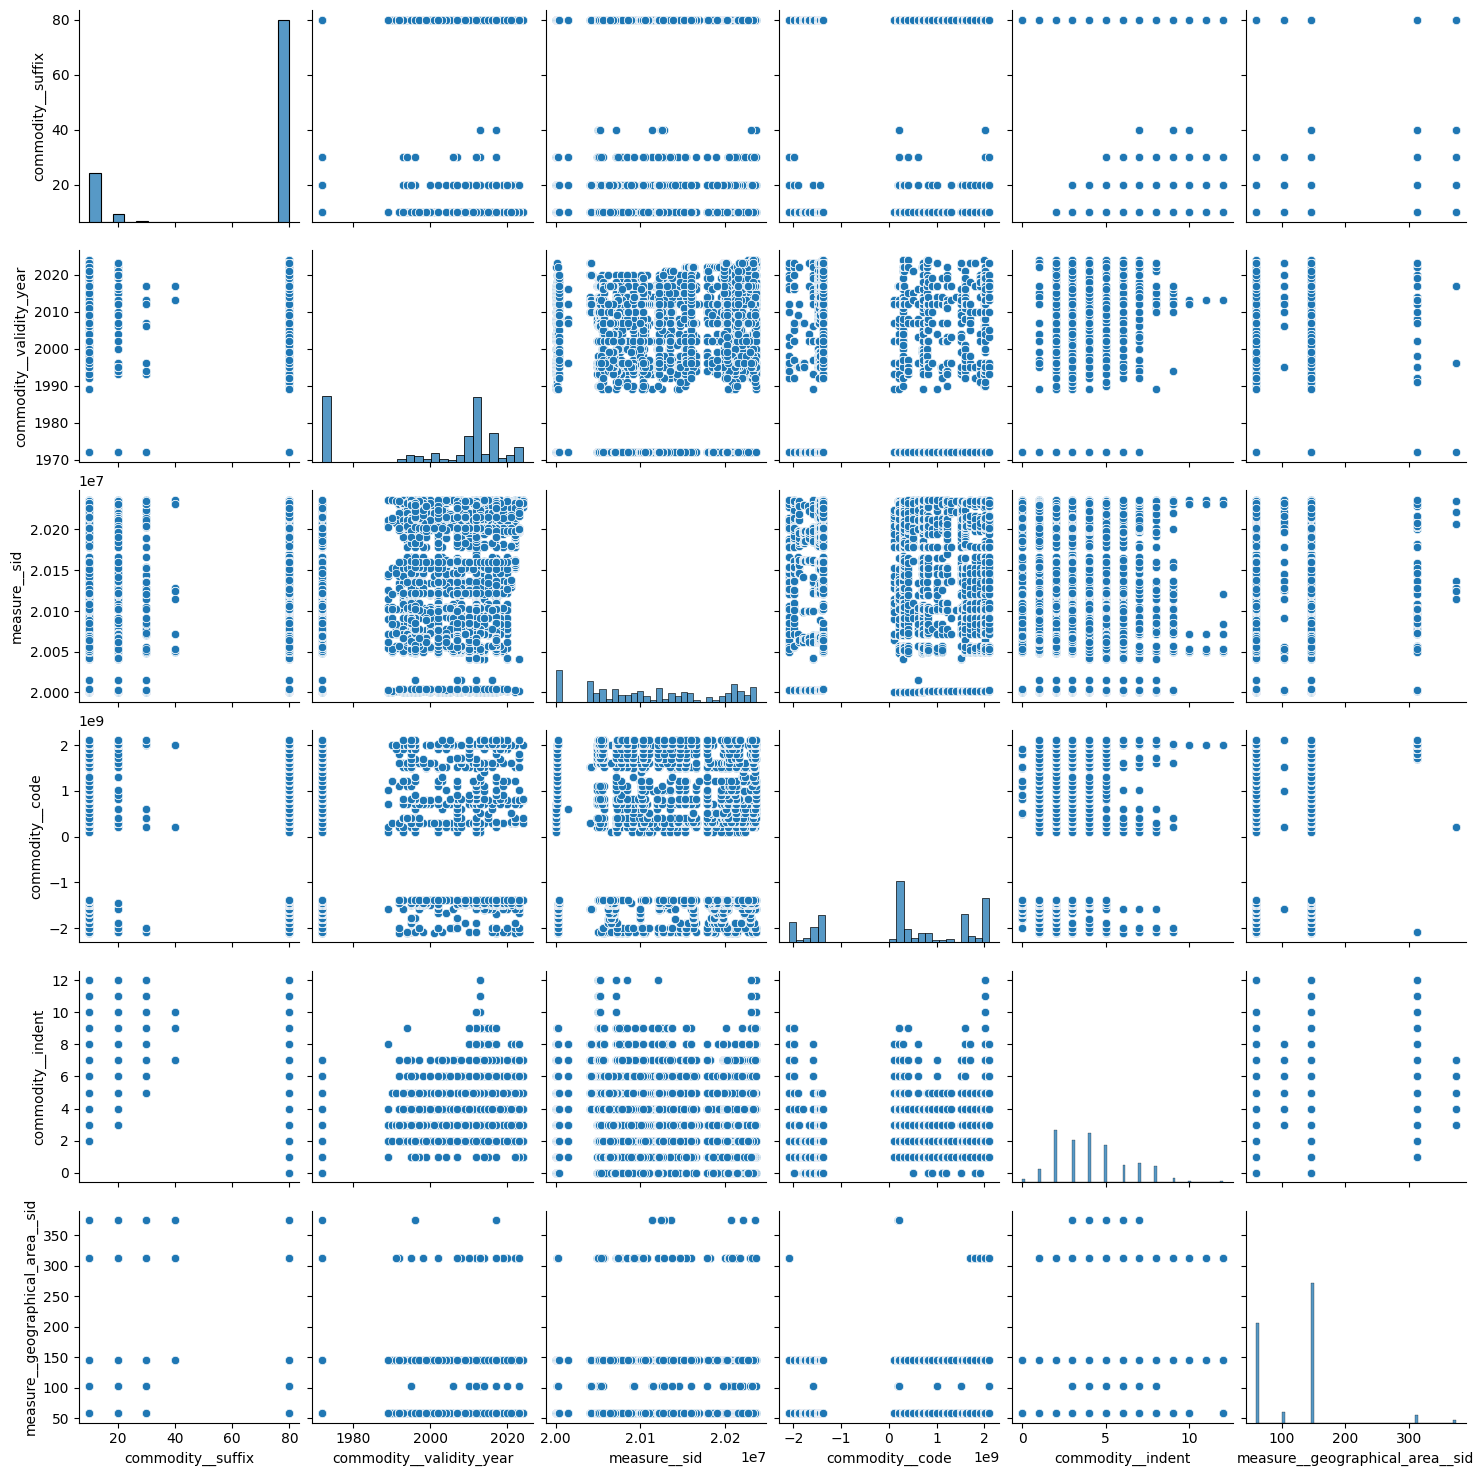

In [ ]:

sns.pairplot(MFN_data_North_America[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']])


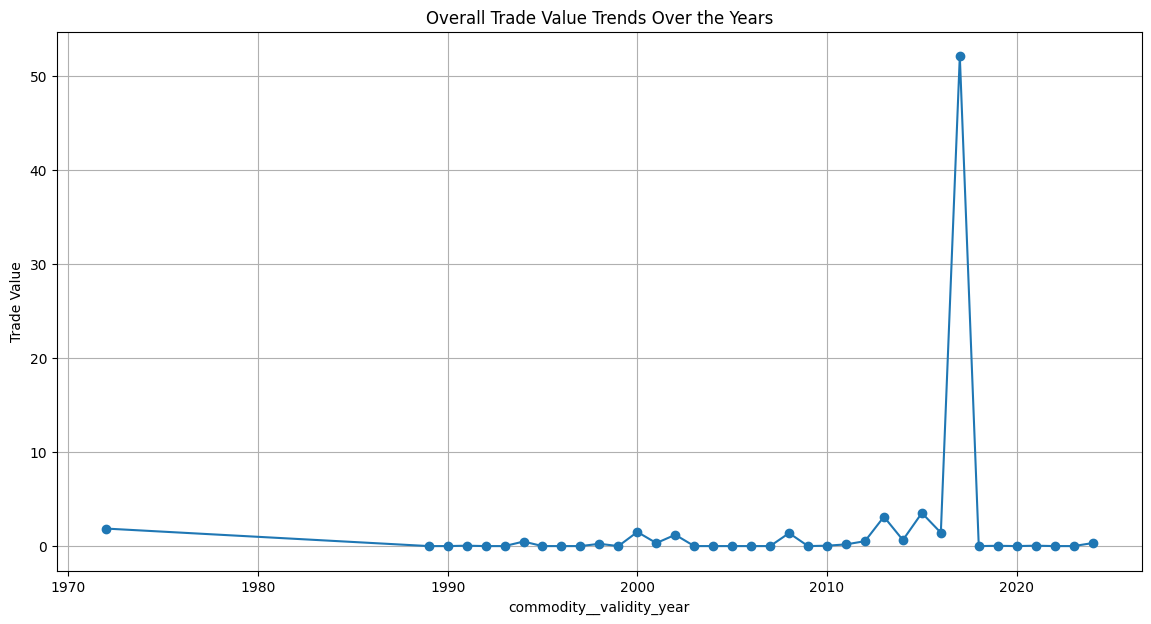

In [ ]:
MFN_data_North_America['commodity__validity_year'] = pd.to_datetime(MFN_data_North_America['commodity__validity_year'], format='%Y')

#Line Chart - Overall trade value trends over the years
annual_trade_value = MFN_data_North_America.groupby(MFN_data_North_America['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.grid(True)
plt.show()

In [ ]:
if 'commodity__validity_year' in MFN_data_North_America.columns:
    MFN_data_North_America['commodity__validity_year'] = pd.to_datetime(MFN_data_North_America['commodity__validity_year'], format='%Y')

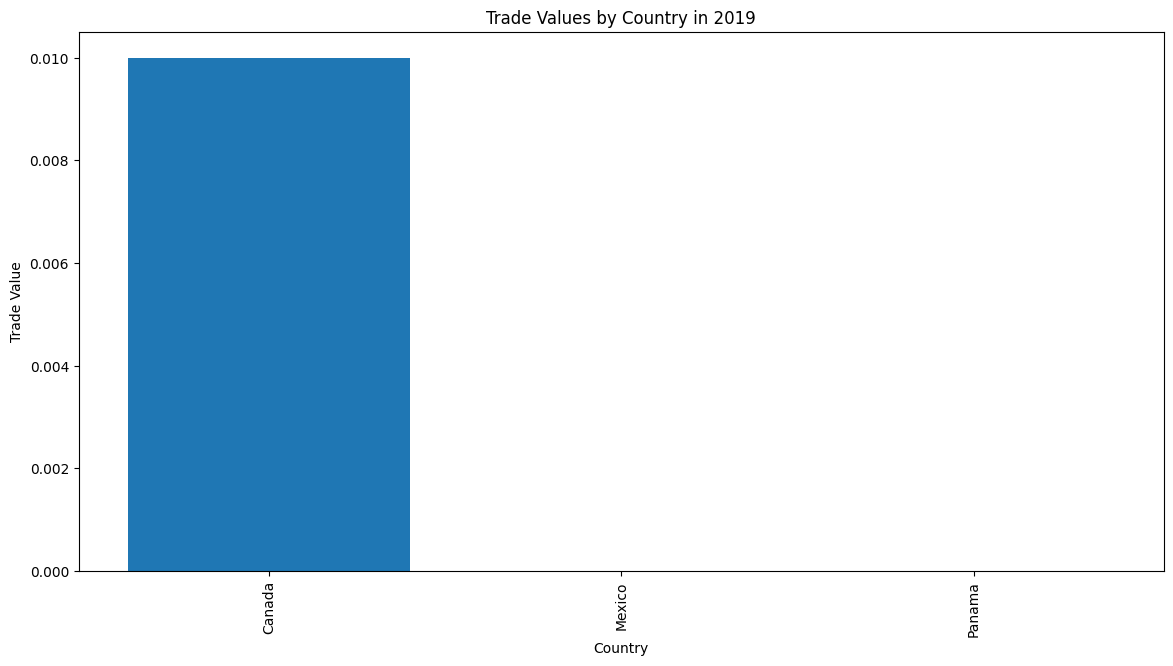

In [ ]:
# 2. Bar Chart: Trade values by country for a specific year
specific_year = 2019  # Change this to the year you're interested in
year_data = MFN_data_North_America[MFN_data_North_America['commodity__validity_year'].dt.year == specific_year]
plt.figure(figsize=(14, 7))
plt.bar(year_data['measure__geographical_area__description'], year_data['measure__duty_expression'])
plt.title(f'Trade Values by Country in {specific_year}')
plt.xlabel('Country')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

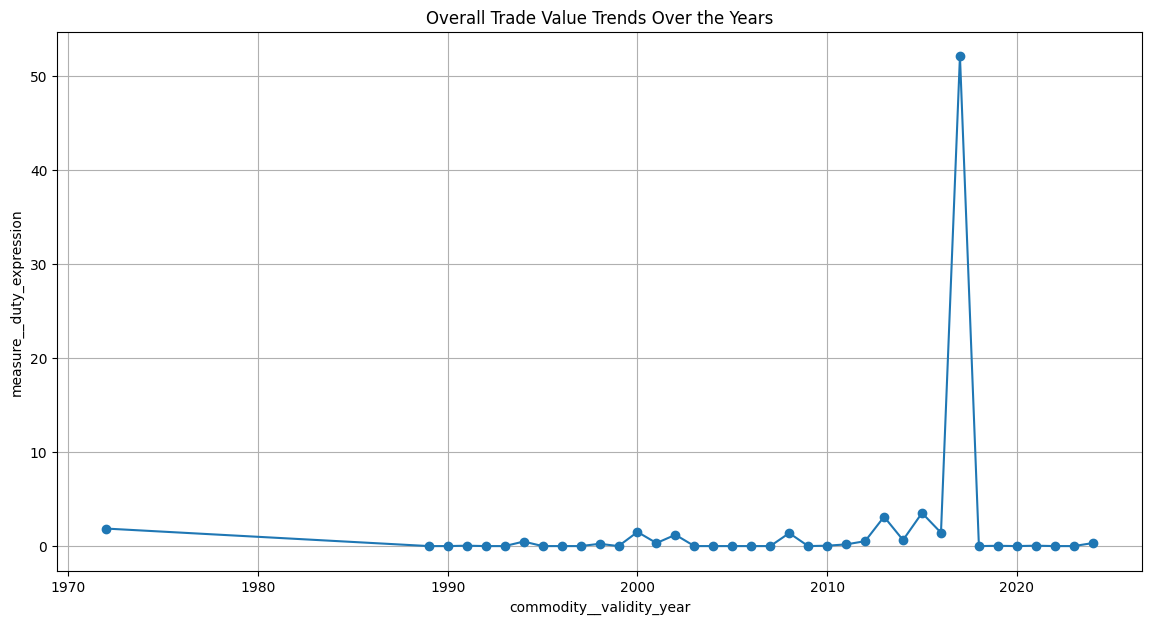

In [ ]:
# 1. Line Chart: Overall trade value trends over the years
annual_trade_value = MFN_data_North_America.groupby(MFN_data_North_America['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('measure__duty_expression')
plt.grid(True)
plt.show()

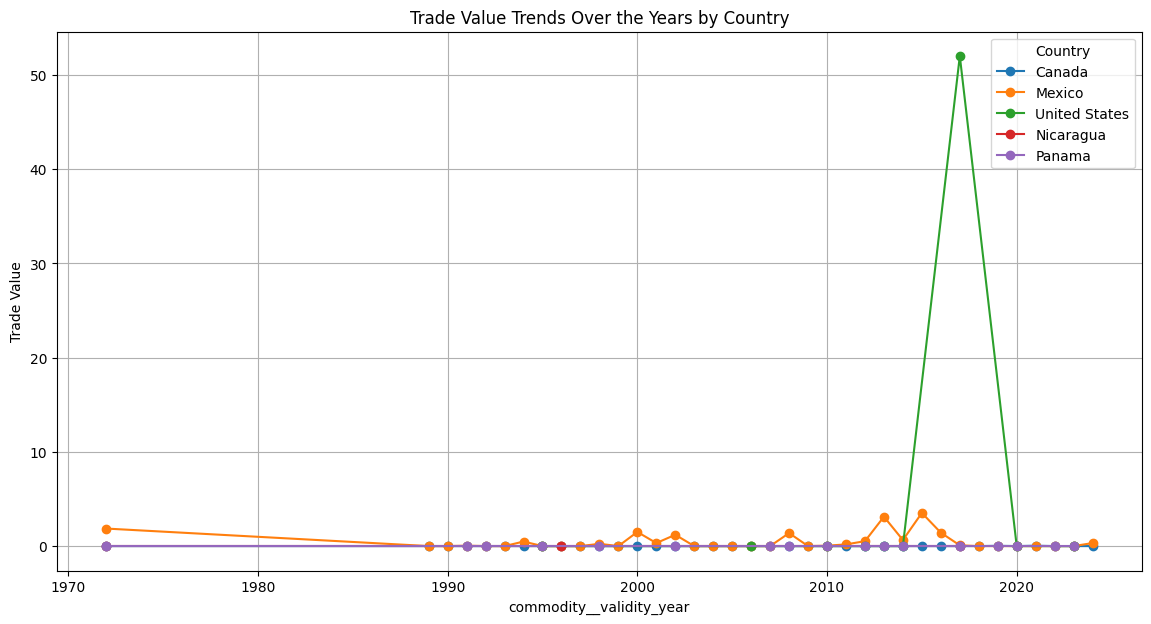

In [ ]:
# 1. Line Chart: Trade value trends over the years for each country
plt.figure(figsize=(14, 7))
for country in MFN_data_North_America['measure__geographical_area__description'].unique():
    country_data = MFN_data_North_America[MFN_data_North_America['measure__geographical_area__description'] == country]
    annual_trade_value = country_data.groupby(country_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=country)
plt.title('Trade Value Trends Over the Years by Country')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

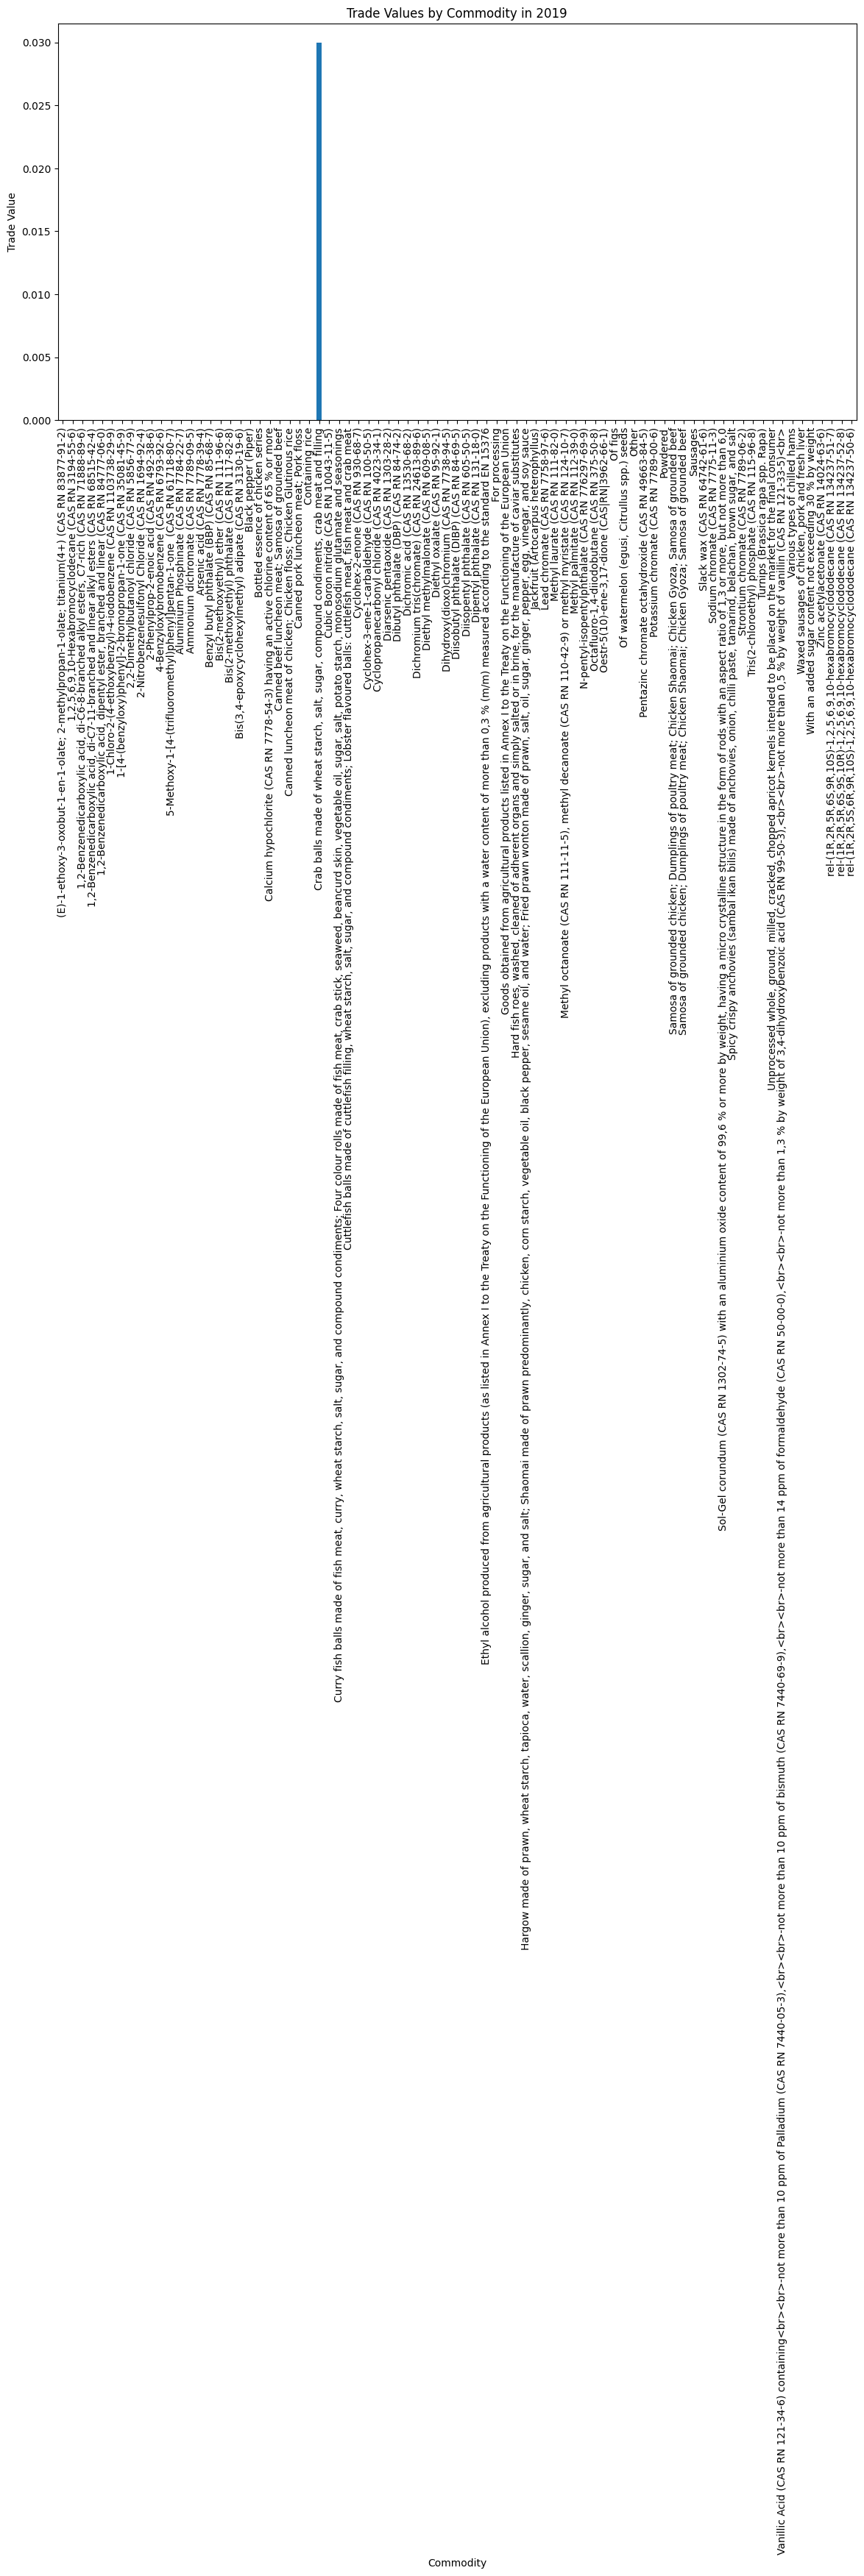

In [ ]:
# 2. Bar Chart: Compare trade values of different commodities for a specific year
specific_year = 2019  # Change this to the year you're interested in
year_data = MFN_data_North_America[MFN_data_North_America['commodity__validity_year'].dt.year == specific_year]
commodity_trade_value = year_data.groupby('commodity__description')['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='bar')
plt.title(f'Trade Values by Commodity in {specific_year}')
plt.xlabel('Commodity')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

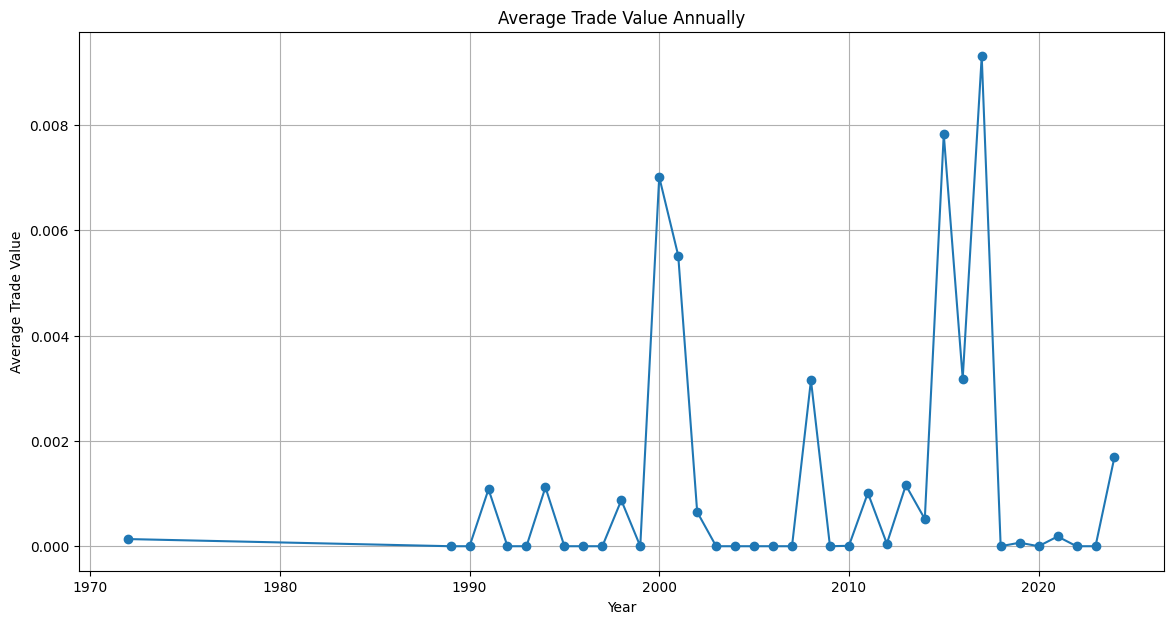

In [ ]:
annual_avg_trade_value = MFN_data_North_America.groupby('commodity__validity_year')['measure__duty_expression'].mean()

# Plot the average trade value annually
plt.figure(figsize=(14, 7))
plt.plot(annual_avg_trade_value.index, annual_avg_trade_value.values, marker='o')
plt.title('Average Trade Value Annually')
plt.xlabel('Year')
plt.ylabel('Average Trade Value')
plt.grid(True)
plt.show()

In [ ]:
MFN_data_North_America['commodity__description'].value_counts().head(12)

commodity__description
Other                                                                                                                                                                                                                   12819
Consigned from Canada                                                                                                                                                                                                    1611
Blends containing by weight more than 20% of fatty-acid mono-alkyl esters and/or paraffinic gasoil obtained from synthesis and/or hydro-treatment, of non-fossil origin                                                   954
Of an actual alcoholic strength by volume not exceeding 13 % vol                                                                                                                                                          534
Powdered                                                                                 

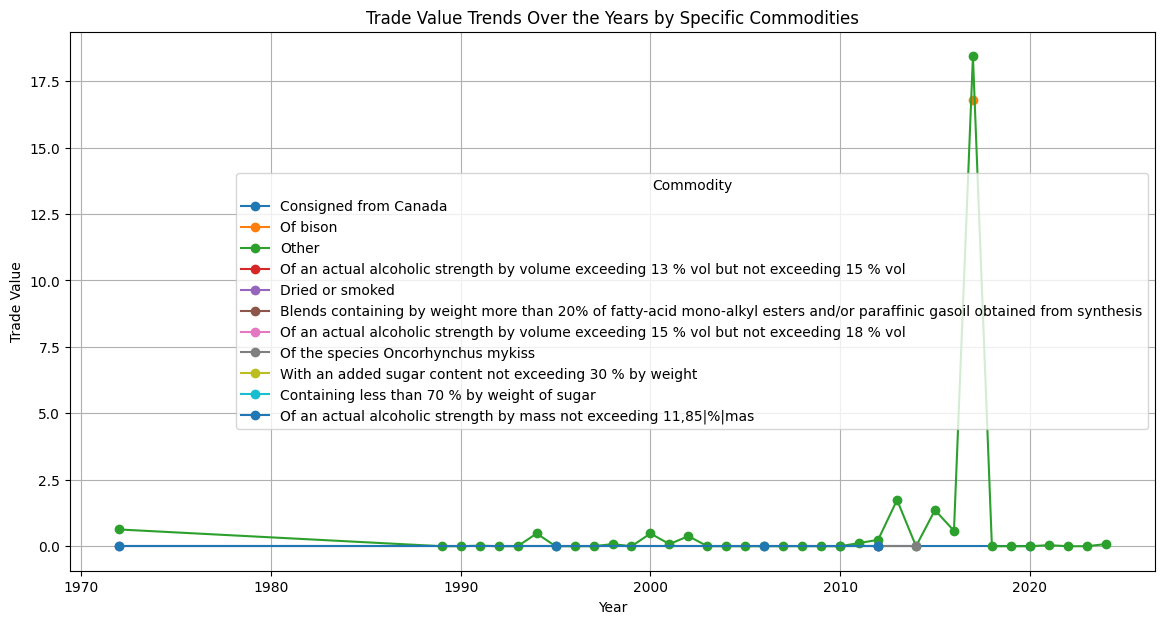

In [ ]:
# List of specific commodities to analyze
commodities_to_analyze = ['Consigned from Canada', 'Of bison', 'Other', 'Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol', 'Dried or smoked', 'Blends containing by weight more than 20% of fatty-acid mono-alkyl esters and/or paraffinic gasoil obtained from synthesis', 'Of an actual alcoholic strength by volume exceeding 15 % vol but not exceeding 18 % vol', 'Of the species Oncorhynchus mykiss', 'With an added sugar content not exceeding 30 % by weight ', 'Containing less than 70 % by weight of sugar', 'Of an actual alcoholic strength by mass not exceeding 11,85|%|mas']

# Filter data for specific commodities
filtered_df = MFN_data_North_America[MFN_data_North_America['commodity__description'].isin(commodities_to_analyze)]

# 1. Line Chart: Trade value trends over the years for each specific commodity
plt.figure(figsize=(14, 7))
for commodity in commodities_to_analyze:
    commodity_data = filtered_df[filtered_df['commodity__description'] == commodity]
    annual_trade_value = commodity_data.groupby(commodity_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=commodity)
plt.title('Trade Value Trends Over the Years by Specific Commodities')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

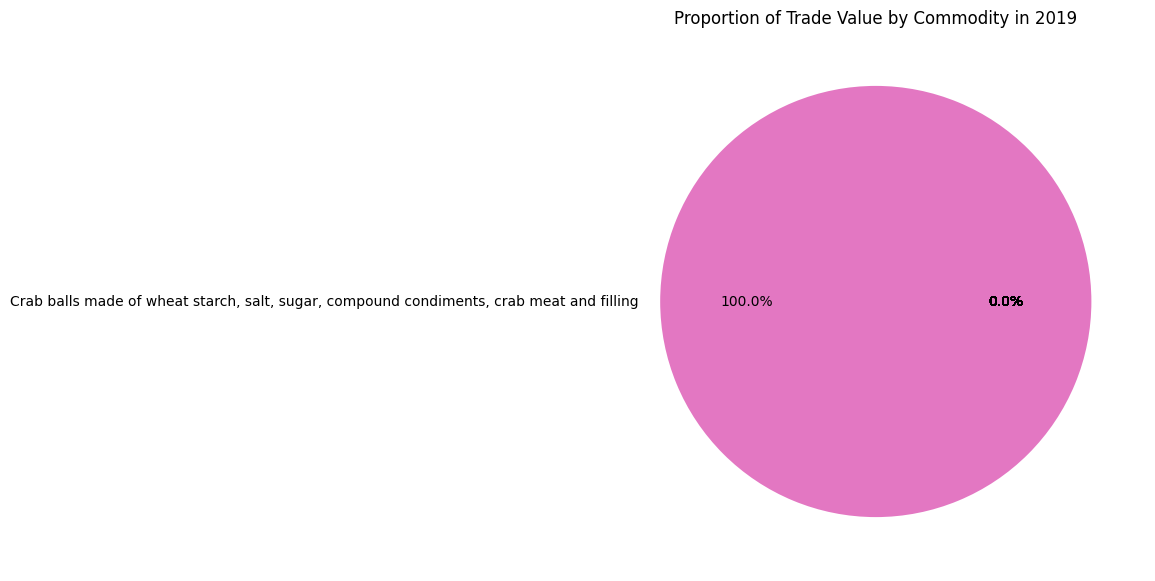

In [ ]:
# Plot 3: Pie Chart - Proportion of trade value by commodity for a specific year
plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Proportion of Trade Value by Commodity in {specific_year}')
plt.ylabel('')
plt.show()

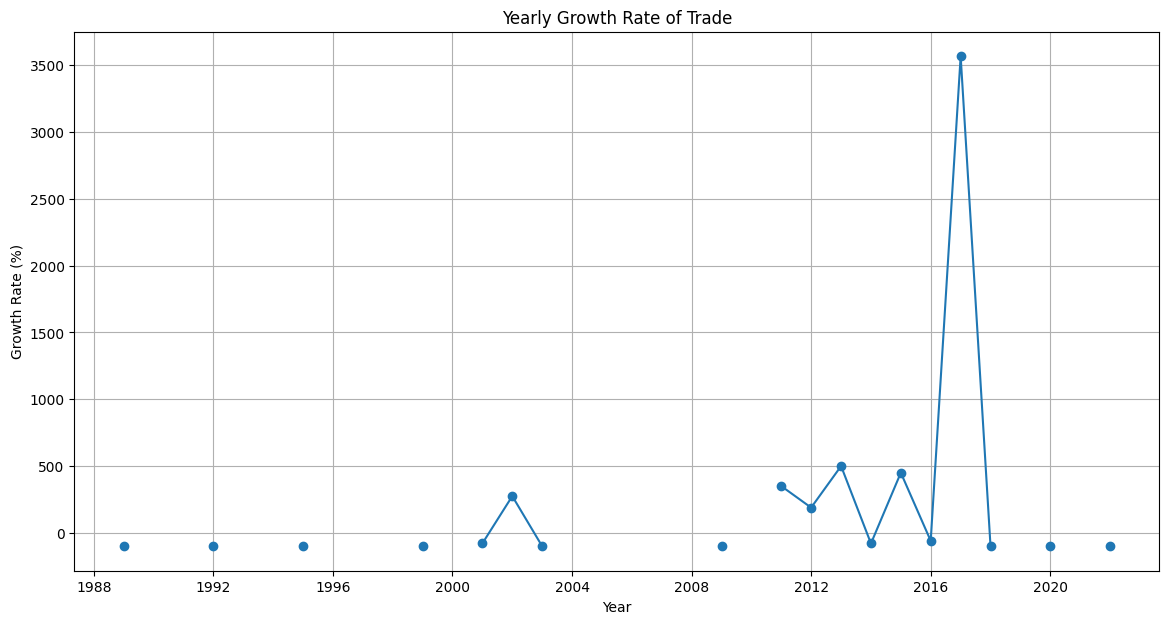

In [ ]:
# Calculate the annual trade value
annual_trade_value = MFN_data_North_America.groupby('commodity__validity_year')['measure__duty_expression'].sum()

# Calculate the yearly growth rate
annual_growth_rate = annual_trade_value.pct_change() * 100

# Plot the yearly growth rate
plt.figure(figsize=(14, 7))
plt.plot(annual_growth_rate.index, annual_growth_rate.values, marker='o')
plt.title('Yearly Growth Rate of Trade')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

In [ ]:
X = MFN_data_North_America.drop(columns=['measure__duty_expression'])
y = MFN_data_North_America['measure__duty_expression']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define and train the model
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}
confusion_matrices = {}
accuracies = {}


In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description']

for column in categorical_columns:
    le = LabelEncoder()
    MFN_data_North_America[column] = le.fit_transform(MFN_data_North_America[column])
    label_encoders[column] = le


In [ ]:
# Encode categorical variables
for column in categorical_columns:
    le = LabelEncoder()
    MFN_data_North_America[column] = le.fit_transform(MFN_data_North_America[column])

# Select features and target
X = MFN_data_North_America.drop(['measure__duty_expression'], axis=1)
y = MFN_data_North_America['measure__duty_expression']

# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., Unix timestamp)
for col in datetime_cols:
    X[col] = (X[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate the models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy percentage
    accuracy = np.mean(np.round(y_test) == np.round(y_pred)) * 100

    results[name] = {'Mean Squared Error': mse, 'R^2 Score': r2, 'Accuracy Percentage': accuracy}
results_df = pd.DataFrame(results).T
results_df

,Mean Squared Error,R^2 Score,Accuracy Percentage
Linear Regression,0.000155,0.061762,100.0
Random Forest Regression,0.000002,0.986272,100.0
Gradient Boosting Regression,0.000003,0.979481,100.0


In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description', 'measure__duty_expression']

for column in categorical_columns:
    le = LabelEncoder()
    MFN_data_North_America[column] = le.fit_transform(MFN_data_North_America[column])
    label_encoders[column] = le

In [ ]:
# Features and target variable
X = MFN_data_North_America.drop(columns=['commodity__suffix'])
y = MFN_data_North_America['commodity__suffix']

In [ ]:
# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., Unix timestamp)
for col in datetime_cols:
    X[col] = (X[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')

Decision Tree Accuracy: 0.9871284378183165


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest model Accuracy: {accuracy_knn * 100}')

Random Forest model Accuracy: 97.2404852301139


In [ ]:
# Train the k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy_knn * 100}')

k-NN Accuracy: 84.60968608204463


In [ ]:
# Store confusion matrices in a dictionary for easy display
confusion_matrices = {
    'Decision Tree': confusion_matrix_dt,
    'k-NN': confusion_matrix_knn,
    'RF': confusion_matrix_rf
}

In [ ]:
for name, matrix in confusion_matrices.items():
    print(f"{name} Confusion Matrix:\n{matrix}\n")

Decision Tree Confusion Matrix:
[[1938    1    0    0   54]
 [   1  309    0    0   13]
 [   0    0   65    0    0]
 [   0    0    0    5    1]
 [  67    0    2    0 8343]]

k-NN Confusion Matrix:
[[1062   31    3    0  897]
 [  73  139    3    0  108]
 [  17   11   24    0   13]
 [   5    0    0    0    1]
 [ 433   59    8    0 7912]]

RF Confusion Matrix:
[[1796    1    0    0  196]
 [   3  309    0    0   11]
 [   1    1   63    0    0]
 [   0    0    1    5    0]
 [  84    0    0    0 8328]]



In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Decision Tree Model Evaluation:
Accuracy: 0.9871
Precision: 0.9872
Recall: 0.9871
F1 Score: 0.9871


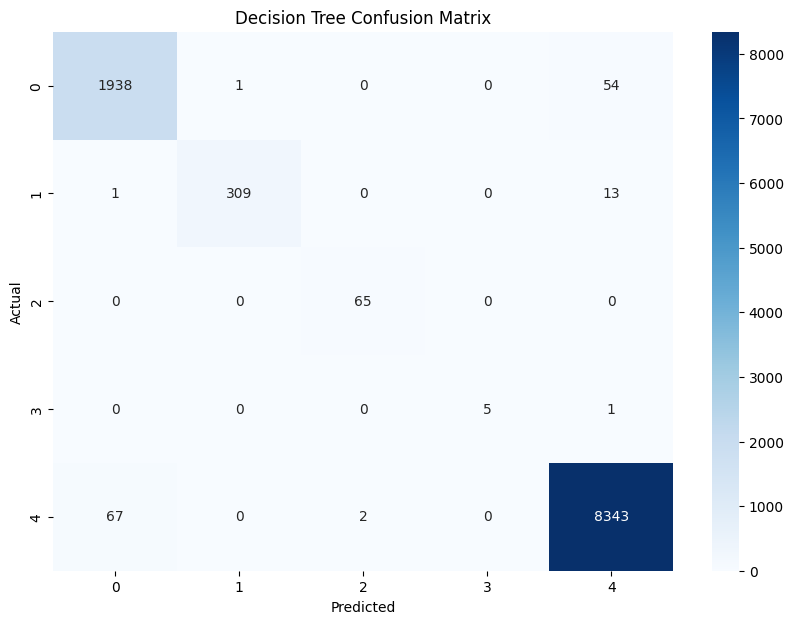

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')

Random Forest Model Evaluation:
Accuracy: 0.9724
Precision: 0.9722
Recall: 0.9724
F1 Score: 0.9721


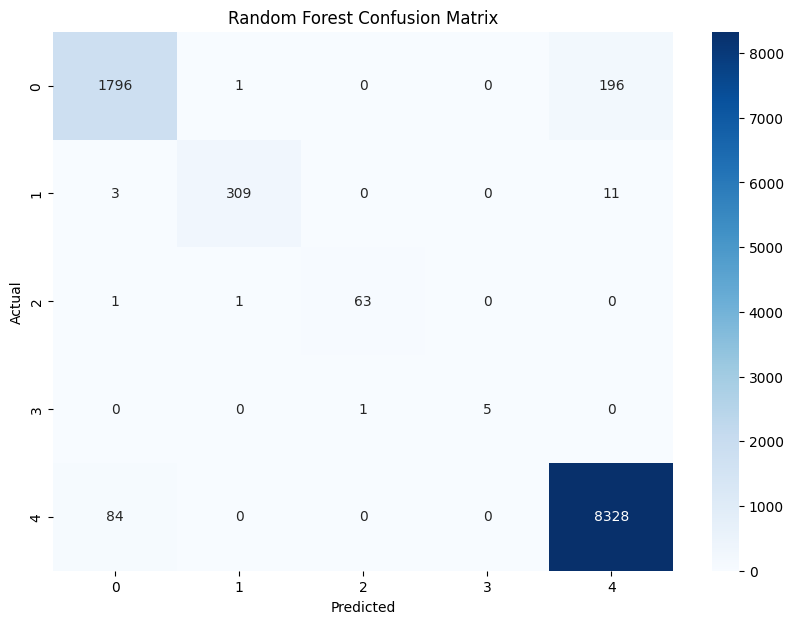

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

k-NN Model Evaluation:
Accuracy: 0.8461
Precision: 0.8350
Recall: 0.8461
F1 Score: 0.8377


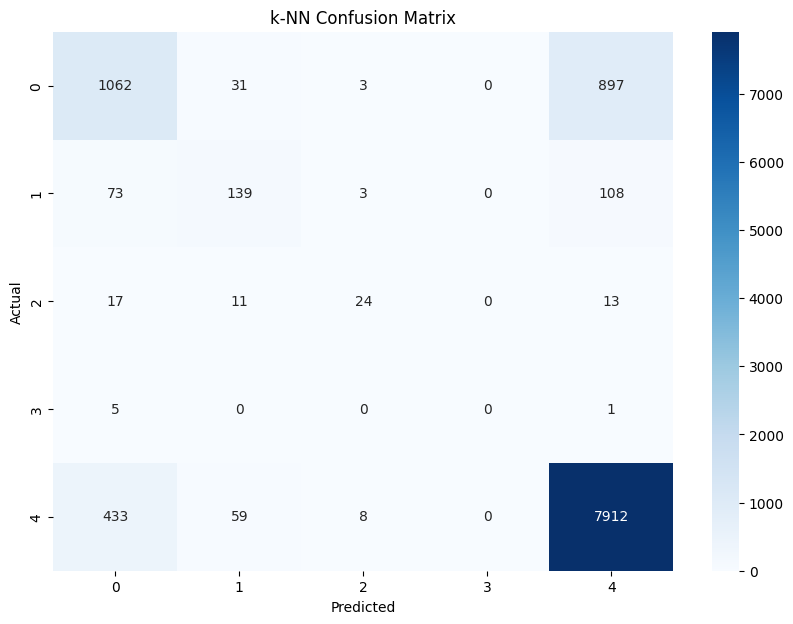

In [ ]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'k-NN')

In [ ]:
cols = ['commodity__code','measure__duty_expression']
MFN_data_North_America1 =  MFN_data_North_America[cols]

In [ ]:
WCSS = []
for i in range(1,10):
  kn = KMeans(n_clusters=i)
  kn.fit(MFN_data_North_America1)
  WCSS.append(kn.inertia_)

In [ ]:
WCSS

[1.0052389810830976e+23,
 2.262372344755421e+22,
 3.4080318549843803e+21,
 2.2529728407195825e+21,
 1.28079171543097e+21,
 4.592825827332978e+20,
 3.2562930491306036e+20,
 2.387985714970907e+20,
 1.8122425322548403e+20]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

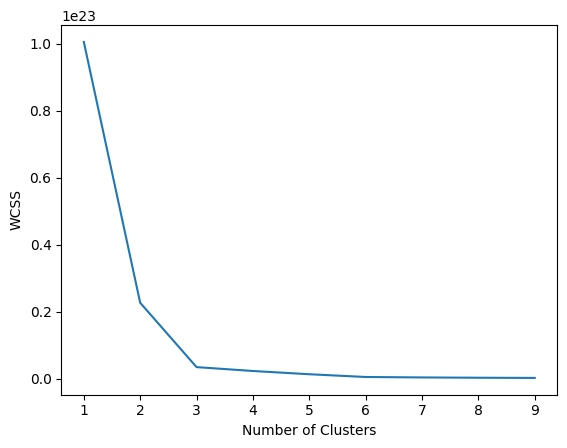

In [ ]:
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt

In [ ]:
x = MFN_data_North_America1.iloc[:,:].values
km = KMeans(n_clusters=3)
y_mean = km.fit_predict(x)

In [ ]:
y_mean

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

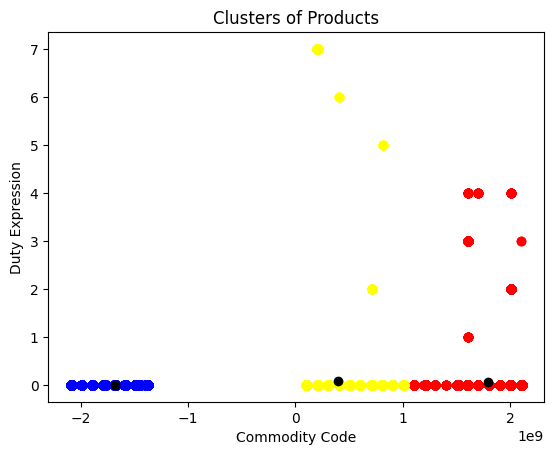

In [ ]:
plt.scatter(x[y_mean == 0,0],x[y_mean == 0,1], color = 'red')
plt.scatter(x[y_mean == 1,0],x[y_mean == 1,1], color = 'blue')
plt.scatter(x[y_mean == 2,0],x[y_mean == 2,1], color = 'yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black')
plt.title('Clusters of Products')
plt.xlabel('Commodity Code')
plt.ylabel('Duty Expression')
plt.show()

In [ ]:
# Select relevant features
selected_columns = [
    'commodity__code',
    'measure__geographical_area__description',
    'measure__duty_expression',
    'commodity__validity_start'
]

In [ ]:
MFN_data_North_America_selected = MFN_data_North_America[selected_columns]

In [ ]:
# Preprocessing
MFN_data_North_America['commodity__validity_start'] = pd.to_datetime(MFN_data_North_America['commodity__validity_start'])

In [ ]:
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
MFN_data_North_America['measure__geographical_area__description'] = label_encoder.fit_transform(MFN_data_North_America['measure__geographical_area__description'])
MFN_data_North_America[['commodity__code', 'measure__duty_expression']] = scaler.fit_transform(MFN_data_North_America[['commodity__code', 'measure__duty_expression']])
MFN_data_North_America.sort_values('commodity__validity_start', inplace=True)

In [ ]:
# Prepare data for LSTM
sequence_length = 10
def create_sequences(MFN_data_North_America, seq_length):
    xs, ys = [], []
    for i in range(len(MFN_data_North_America) - seq_length):
        x = MFN_data_North_America[i:i+seq_length]
        y = MFN_data_North_America[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

model_data = MFN_data_North_America[['commodity__code', 'measure__geographical_area__description', 'measure__duty_expression']].values
X, y = create_sequences(model_data, sequence_length)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Build and train the improved LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(sequence_length, 3)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/50
540/540 [==============================] - 40s 51ms/step - loss: 0.2414 - val_loss: 0.2158 - lr: 0.0010
Epoch 2/50
540/540 [==============================] - 21s 38ms/step - loss: 0.2056 - val_loss: 0.1997 - lr: 0.0010
Epoch 3/50
540/540 [==============================] - 19s 36ms/step - loss: 0.1971 - val_loss: 0.1936 - lr: 0.0010
Epoch 4/50
540/540 [==============================] - 20s 37ms/step - loss: 0.1896 - val_loss: 0.1905 - lr: 0.0010
Epoch 5/50
540/540 [==============================] - 29s 54ms/step - loss: 0.1842 - val_loss: 0.1835 - lr: 0.0010
Epoch 6/50
540/540 [==============================] - 22s 41ms/step - loss: 0.1794 - val_loss: 0.1819 - lr: 0.0010
Epoch 7/50
540/540 [==============================] - 20s 36ms/step - loss: 0.1766 - val_loss: 0.1792 - lr: 0.0010
Epoch 8/50
540/540 [==============================] - 21s 39ms/step - loss: 0.1734 - val_loss: 0.1769 - lr: 0.0010
Epoch 9/50
540/540 [==============================] - 19s 36ms/step - loss: 0.17

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


338/338 [==============================] - 3s 8ms/step - loss: 0.1644
Test Loss: 0.16442327201366425


In [ ]:
# Make predictions
predictions = model.predict(X_test)

338/338 [==============================] - 6s 9ms/step


In [ ]:
# Example: Display the first 5 predictions and actual values
for i in range(5):
    print(f'Prediction: {predictions[i]}, Actual: {y_test[i]}')

Prediction: [0.62389255 0.39479548 0.09639788], Actual: [0.54660643 4.         1.        ]
Prediction: [0.07153088 0.0639089  0.0032897 ], Actual: [0.00074477 0.         0.        ]
Prediction: [0.5951485  0.85764706 0.00932638], Actual: [0.5470647 1.        0.       ]
Prediction: [0.7826427  0.7519398  0.05362764], Actual: [0.88002218 0.         0.        ]
Prediction: [0.9318419  0.65275633 0.02570826], Actual: [0.97679223 1.         0.1       ]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Calculate MAE, RMSE, and MAPE
def calculate_metrics(predictions, actuals):
    mae = np.mean(np.abs(predictions - actuals))
    rmse = np.sqrt(np.mean((predictions - actuals) ** 2))

    # Handling division by zero in MAPE calculation
    non_zero_actuals = np.where(actuals != 0, actuals, np.nan)
    mape = np.nanmean(np.abs((predictions - non_zero_actuals) / non_zero_actuals)) * 100

    return mae, rmse, mape

In [ ]:
mae, rmse, mape = calculate_metrics(predictions, y_test)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.17141609962549215
RMSE: 0.4054914507945757
MAPE: 560.8172216172787%
